<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
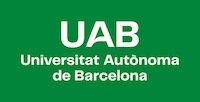
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104346 - Processament de Senyal, Imatge i Vídeo</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    Nom, cognoms i NIU: Lucia Garrido (1671463), Albert Guillaumet (1672344), David Morillo (1666540), Adrià Muro (1665191)
</div>

# **S4-2 Laboratori**: _Restoration in the presence of noise_

La qualitat de les imatges digitals és un aspecte crític en una àmplia gamma d'aplicacions, des de la fotografia fins a la visió per ordinador i el processament d'imatges mèdiques. Tot i això, aquestes imatges estan subjectes a diversos tipus de degradacions, sent una de les més comunes la introducció de soroll. El soroll a les imatges digitals pot sorgir de múltiples fonts, com ara l'electrònica dels dispositius de captura, la transmissió de dades o el processament d'imatges.

És important destacar que la presència de soroll a les imatges digitals pot comprometre seriosament la seva utilitat i confiabilitat en diverses aplicacions. Per tant, el desenvolupament de tècniques efectives per mitigar l'impacte del soroll és molt important. Aquestes tècniques inclouen mètodes de filtratge que busquen eliminar o reduir la presència del soroll sense sacrificar la informació rellevant a la imatge.

<u>Format de l'entrega</u>:
- Cal entregar el _notebook_ **executat, sense errors i amb els resultats** de totes les cel·les (en format `.ipynb`).
- Addicionalment, també cal entregar l'exportació del _notebook_ executat en format **HTML** (`File` -> `Save and export notebook as...` -> `HTML`).

## OpenCV

En aquesta activitat utilitzarem, per a la manipulació de la imatges, la llibreria [OpenCV](https://pypi.org/project/opencv-python/). OpenCV (Open Source Computer Vision Library) és una biblioteca de codi obert àmpliament utilitzada al camp de la visió per ordinador i el processament d'imatges. 

Proporciona una àmplia gamma d'eines i funcions que permeten als desenvolupadors treballar amb imatges i vídeos de manera eficient. OpenCV ofereix suport per a diverses operacions de processament d'imatges, com ara detecció d'objectes, seguiment de moviment, reconeixement facial, calibratge de càmeres, segmentació d'imatges, entre moltes altres. 

Per instal·lar aquesta llibreria, podem executar:

> pip install opencv-python

Per més informació, consultar:
- https://pypi.org/project/opencv-python/

In [25]:
# Llibreries necessaries per aquest exercici
import cv2
import numpy as np

from matplotlib import pyplot as plt

## Exercici 1 (_2 punts_)

Adjunt a aquest _notebook_ trobaràs 5 imatges:
- `sample_1.jpeg`: imatge original 
- `sample_noise_1.jpg`: imatge perturbada amb soroll additiu de tipus 1
- `sample_noise_2.jpg`: imatge perturbada amb soroll additiu de tipus 2
- `sample_noise_3.jpg`: imatge perturbada amb soroll additiu de tipus 3
- `sample_noise_4.jpg`: imatge perturbada amb soroll additiu de tipus 4

Implementa els següents apartats:
1. Carrega i visualitztza les imatges ementades en format `numpy` en escala de grisos de 256 valors (és a dir, en el rang `[0,255]`)
2. Genera els histogrames d'aquestes imatges i intenta determinar el tipus de soroll que s'hi ha afegit (basant-ne en les observacions de l'histograma). Justifica la teva resposta.

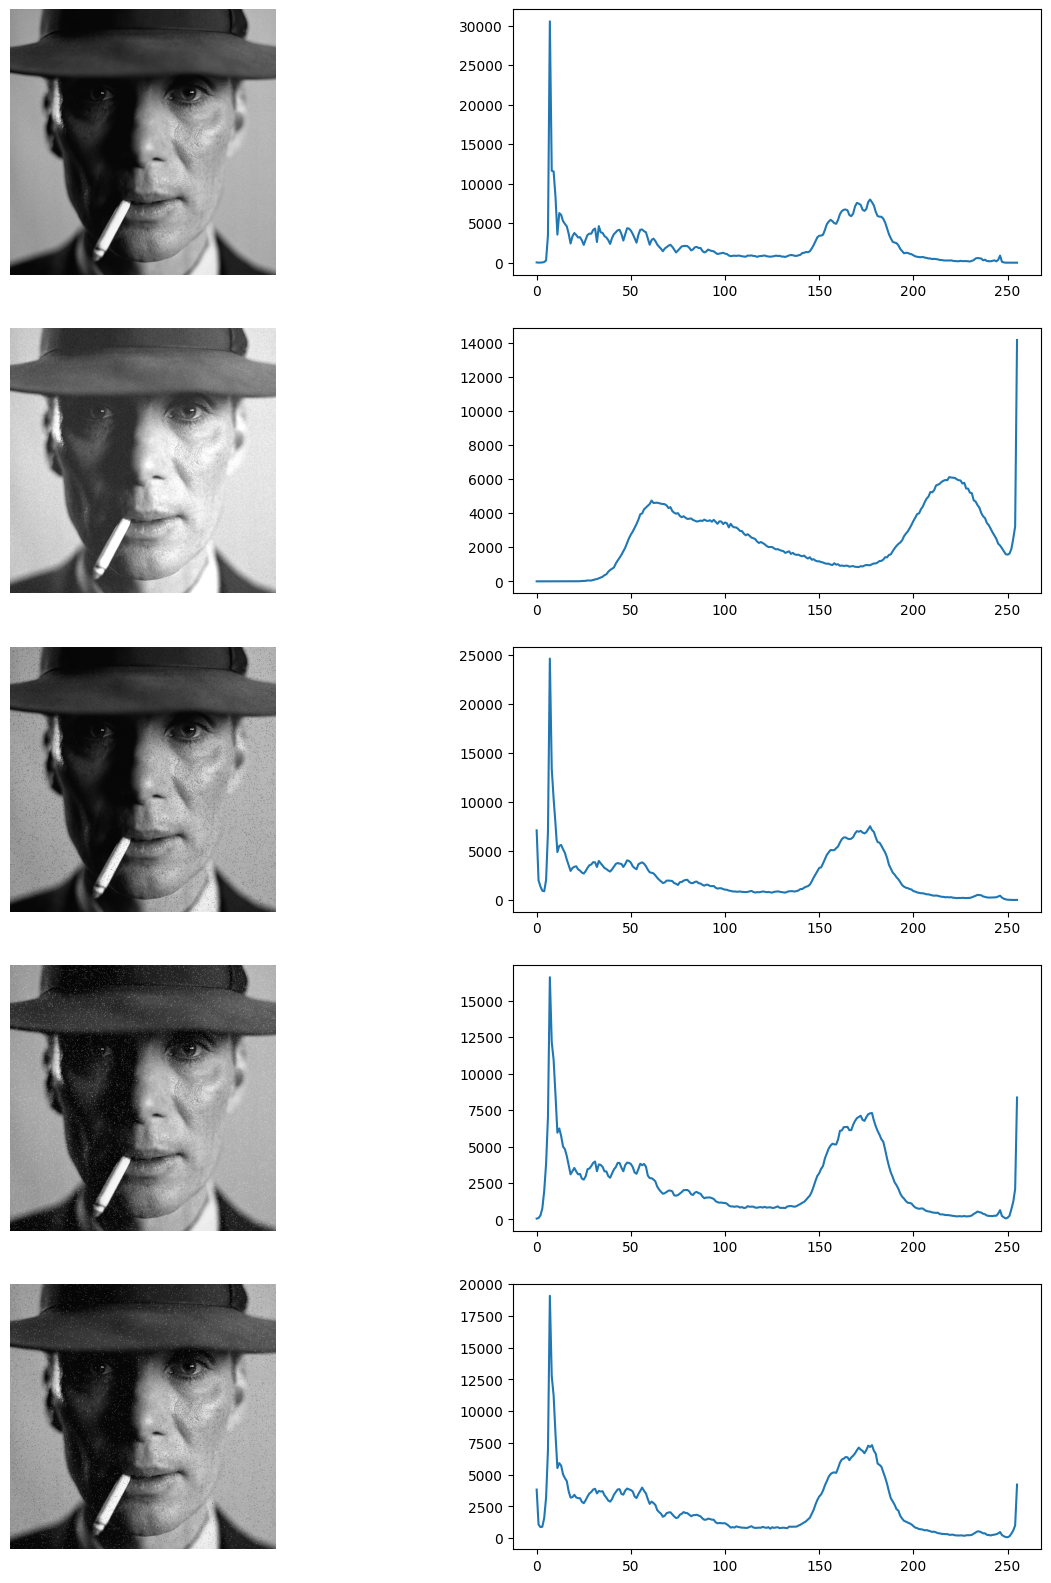

In [26]:
imgs_name = ['sample_1.jpeg', 'sample_noise_1.jpg', 'sample_noise_2.jpg', 'sample_noise_3.jpg', 'sample_noise_4.jpg']

#Llegir imatges en escala de grisos
imgs = [cv2.imread(nombre_archivo, cv2.IMREAD_GRAYSCALE) for nombre_archivo in imgs_name]

#Creem la figura per a les 5 imatges i els histogrames
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for i, img in enumerate(imgs):
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].axis("off")
    axs[i, 1].plot(cv2.calcHist([img], [0], None, [256], [0, 256]))

plt.show()

A partir dels histogrames intentarem analitzar quin tipus de soroll s'ha afegit a les imatges

Imatge 1:
    Imatge original (sense soroll)

Imatge 2:
    Rayleigh (Valors prop de 0 gairebé inexistents)

Imatge 3:
    Exponencial (Gran augment de valors negres i disminució dels clars)
    
Imatge 4:
    Erlang (Gamma)
    
Imatge 5:
    Salt-and-pepper (Augment de valors igual a 0 i 255)

## Exercici 2 (_5 punts_)

En aquesta part, **implementarem 5 filtres** per intentar restaurar les imatges i estudiar-ne els resultats.

En concret, implementarem (**obligatòriament**):
- Arithmetic Mean Filter
- Median Filter
- Max Filter
- Min Filter
- Midpoint Filter

Per cadascun dels filtres anteriors, es demana:
1. Implementar el filtre en codi en Python, sense fer ús de llibreries externes (excepte `numpy`, `math` o altres llibrerires bàsiques).
2. Aplicar el filtre a TOTES les imatges perturbades junt amb aquest enunciat (excloent la imatge original), modificant els paràmetres de cada filtre fins a obtenir el resultat òptim.
3. Indica els paràmetres que han generat el resultat òptim i mostra la imatge perturbada i la imatge restaurada juntes (pots fer ús de la funció `subplots(nrows, ncols)` de la llibreria `matplotlib` o una altra equivalent).

In [27]:
#Arithmetic Mean Filter
def arithmetic_Mean_Filter(img_array):
    #Obtenim grandària de la imatge
    alcada, amplada = img_array.shape
    #Ara creem una matriu amb la mateixa grandària que la imatge
    res = np.zeros_like(img_array, dtype=np.float32) 
    for i in range(1, alcada-1):#Afegim el -1 per a tenir en compte els valors de les cantonades
        for j in range(1, amplada-1):
            #Per a crear la matriu, anidem 2 fors (un per columnes i un per files) i per a cada pixel agafem els del seu voltant
            veins = img_array[i-1:i+2, j-1:j+2]
            
            #Obtenim la mitjana dels veins
            res[i, j] = np.mean(veins)

    return res

In [28]:
#Median filter
def median_filter (img_array):
    #Obtenim grandària de la imatge
    alcada, amplada = img_array.shape
    #Ara creem una matriu amb la mateixa grandària que la imatge
    res = np.zeros_like(img_array, dtype=np.float32) 
    for i in range(1, alcada-1):#Afegim el -1 per a tenir en compte els valors de les cantonades
        for j in range(1, amplada-1):
            #Per a crear la matriu, anidem 2 fors (un per columnes i un per files) i per a cada pixel agafem els del seu voltant
            veins = img_array[i-1:i+2, j-1:j+2]
            
            #Un cop obtinguda la matriu (o array), la ordenem i mirem dagafar el valor del mig.
            #Com la matriu es una 3x3, el valor del mig semppre serà el número 5, per tant l'index 4
            veins = np.ravel(veins)
            veins.sort()
            res[i,j] = veins[4]
    return res

In [29]:
#Max filter
def max_filter(img_array):
    #Obtenim grandària de la imatge
    alcada, amplada = img_array.shape
    #Ara creem una matriu amb la mateixa grandària que la imatge
    res = np.zeros_like(img_array, dtype=np.float32) 
    for i in range(1, alcada-1):#Afegim el -1 per a tenir en compte els valors de les cantonades
        for j in range(1, amplada-1):
            #Per a crear la matriu, anidem 2 fors (un per columnes i un per files) i per a cada pixel agafem els del seu voltant
            veins = img_array[i-1:i+2, j-1:j+2]
            
            res[i, j] = np.max(veins)         
    return res

In [30]:
#Min filter
def min_filter(img_array):
    #Obtenim grandària de la imatge
    alcada, amplada = img_array.shape
    #Ara creem una matriu amb la mateixa grandària que la imatge
    res = np.zeros_like(img_array, dtype=np.float32) 
    for i in range(1, alcada-1):#Afegim el -1 per a tenir en compte els valors de les cantonades
        for j in range(1, amplada-1):
            #Per a crear la matriu, anidem 2 fors (un per columnes i un per files) i per a cada pixel agafem els del seu voltant
            veins = img_array[i-1:i+2, j-1:j+2]
            
            res[i, j] = np.min(veins)
    return res

In [31]:
#Mid point Filter
def mid_point_Filter(img_array):
    #Obtenim grandària de la imatge
    alcada, amplada = img_array.shape
    #Ara creem una matriu amb la mateixa grandària que la imatge
    res = np.zeros_like(img_array, dtype=np.float32) 
    for i in range(1, alcada-1):#Afegim el -1 per a tenir en compte els valors de les cantonades
        for j in range(1, amplada-1):
            #Per a crear la matriu, anidem 2 fors (un per columnes i un per files) i per a cada pixel agafem els del seu voltant
            veins = img_array[i-1:i+2, j-1:j+2]
            
            min_val = np.min(veins)
            max_val = np.max(veins)
            # Calcula el punt mig entre el valor màxim i mínim
            res[i, j] = (min_val + max_val) / 2
    return res

In [32]:
AM_res = []
Med_res = []
Max_res = []
Min_res = []
Mp_res = []

# Aplicar los filtros a las imágenes
for i in range(1, 5):
    AM_res.append(arithmetic_Mean_Filter(imgs[i])) # Aplicar: Arithmetic Mean Filter
    Med_res.append(median_filter(imgs[i])) # Aplicar: Median Filter
    Max_res.append(max_filter(imgs[i])) # Aplicar: Max Filter
    Min_res.append(min_filter(imgs[i])) # Aplicar: Min Filter
    Mp_res.append(mid_point_Filter(imgs[i])) # Aplicar: Mid-point Filter

C:\Users\david\AppData\Local\Temp\ipykernel_23520\1715743805.py:15: RuntimeWarning: overflow encountered in scalar add
  res[i, j] = (min_val + max_val) / 2


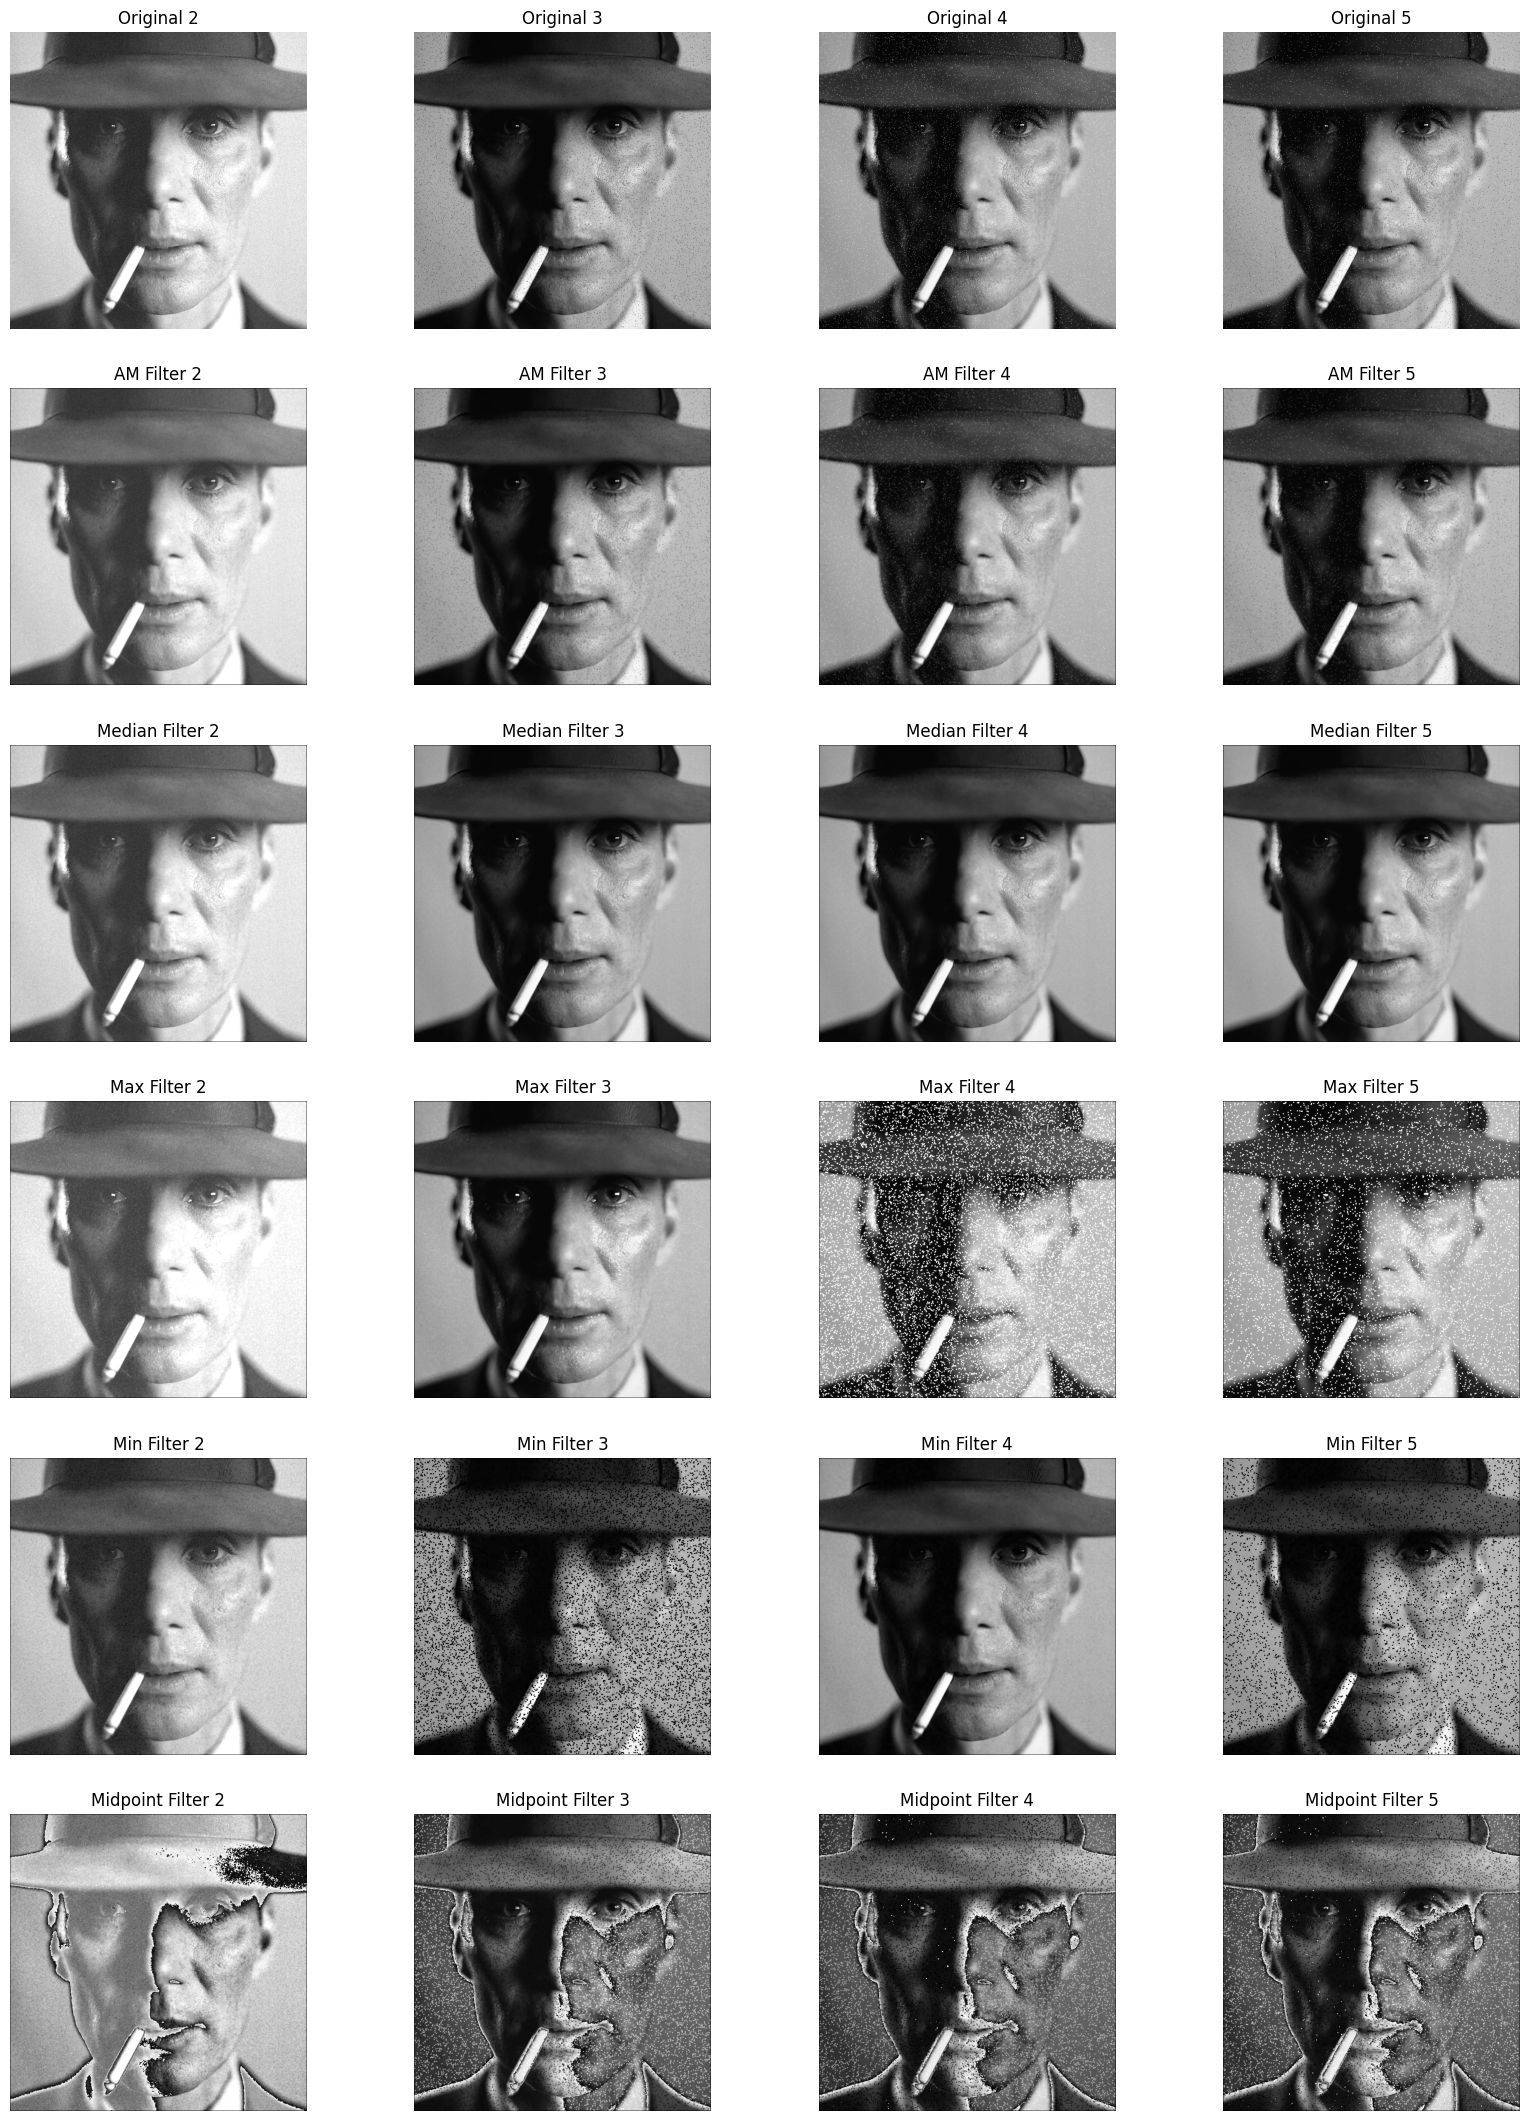

In [33]:
# Crear una nova figura amb 6 files i 4 columnes
fig, axs = plt.subplots(6, 4, figsize=(20, 27))

for i in range(0, 4):
    axs[0, i].imshow(imgs[1+i], cmap='gray'), axs[0, i].set_title(f'Original {2+i}'), axs[0, i].axis("off")
    axs[1, i].imshow(AM_res[i], cmap='gray'), axs[1, i].set_title(f'AM Filter {2+i}'), axs[1, i].axis("off")
    axs[2, i].imshow(Med_res[i], cmap='gray'), axs[2, i].set_title(f'Median Filter {2+i}'), axs[2, i].axis("off")
    axs[3, i].imshow(Max_res[i], cmap='gray'), axs[3, i].set_title(f'Max Filter {2+i}'), axs[3, i].axis("off")
    axs[4, i].imshow(Min_res[i], cmap='gray'), axs[4, i].set_title(f'Min Filter {2+i}'), axs[4, i].axis("off")
    axs[5, i].imshow(Mp_res[i], cmap='gray'), axs[5, i].set_title(f'Midpoint Filter {2+i}'), axs[5, i].axis("off")


# Ajustar l'espai entre els subgràfics per a millor llegibilitat
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Mostra la figura
plt.show()

## Exercici 3 (_1 punt_)

Implementa el filtre:
- Adaptive Median Filter

En relació amb el filtre _Adaptive Median Filter_, es demana:
1. Implementar el filtre en codi en Python (en aquest cas, pots fer de qualsevol llibreria externa).
2. Aplicar el filtre a TOTES les imatges perturbades junt amb aquest enunciat (excloent la imatge original), modificant els paràmetres de cada filtre fins a obtenir el resultat òptim.
3. Indica els paràmetres que han generat el resultat òptim i mostra la imatge perturbada i la imatge restaurada juntes (pots fer ús de la funció `subplots(nrows, ncols)` de la llibreria `matplotlib` o una altra equivalent).

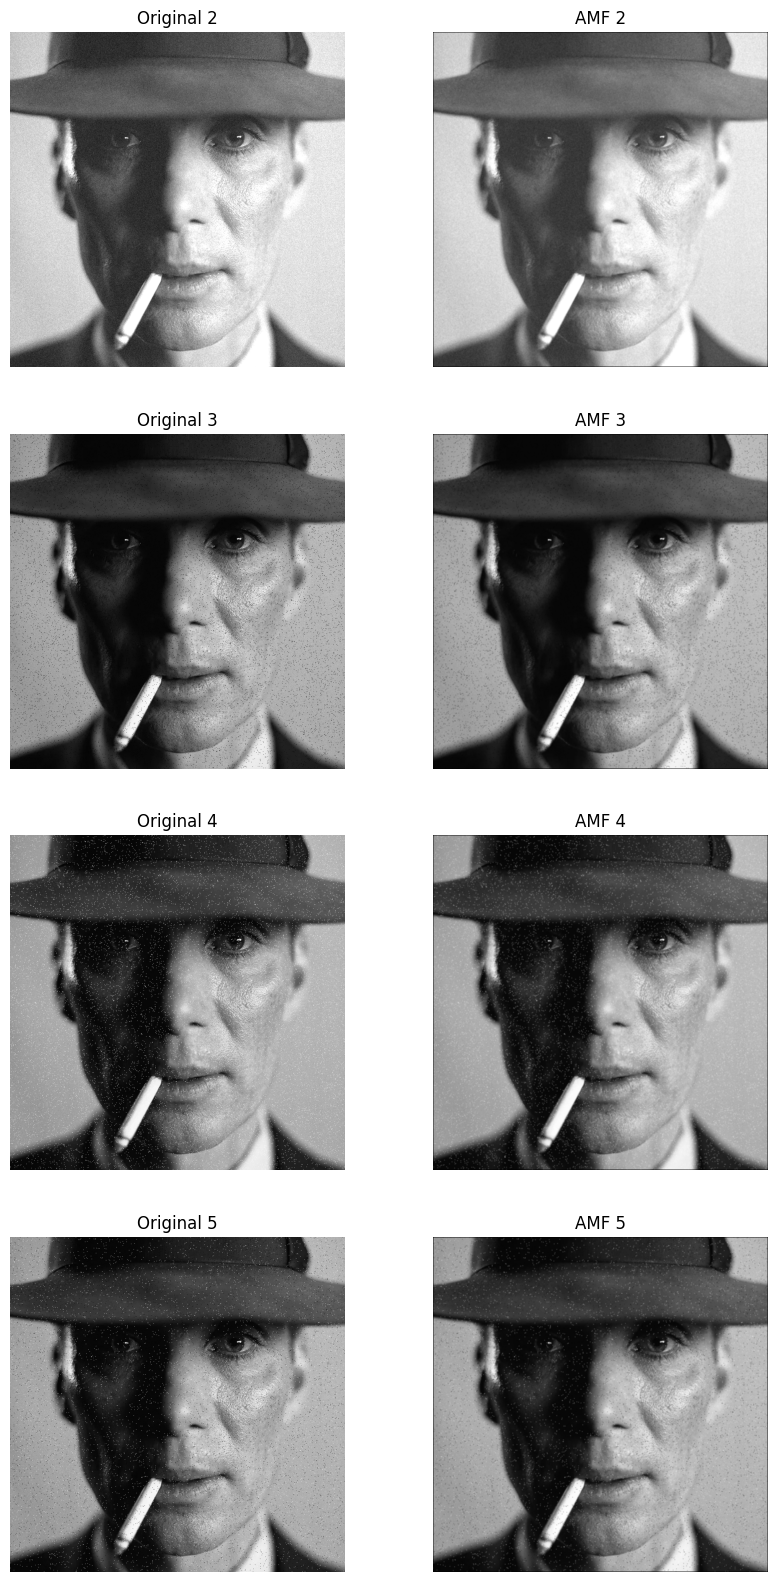

In [34]:
import numpy as np
from scipy.ndimage import median_filter #Importem la llibreria de scipy perque serà més eficient que la nostra implementació

def adaptive_median_filter(img_array, max_w_size=7, a=1, b=1):
    w_size = 3

    while w_size <= max_w_size:
        img_res = median_filter(img_array, size=w_size, mode='reflect')#El mode de reflect gestiona les cantonades de la imatge

        # Condicions basades en Zmin, Zmax, Sxy, i Zxy
        z_min = np.min(img_res)
        z_max = np.max(img_res)
        z_med = np.median(img_res)
        sxy = np.std(img_res) #aqui estem definint les desviacions standards de les imatges
        zxy = np.std(img_array)

        condition1 = (z_med - z_min) > a
        condition2 = (z_max - z_med) > b
        condition3 = (zxy - sxy) > a
        condition4 = (zxy - sxy) > b
        #Aquestes 4 imatges ens serveixen per determinar si hem o no d'augmentar la grandària de la finestra
        if condition1 and condition2 and condition3 and condition4:
            break

        img_array = img_res
        w_size += 1

    return img_array

# Crear una nova figura amb 4 files i 2 columnes
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

adaptive_MF = []

for i in range(1, 5):
    adaptive_MF.append(arithmetic_Mean_Filter(imgs[i]))

# Subplots per a les imatges originals
axs[0, 0].imshow(imgs[1], cmap='gray'), axs[0, 0].set_title('Original 2'), axs[0, 0].axis("off")
axs[1, 0].imshow(imgs[2], cmap='gray'), axs[1, 0].set_title('Original 3'), axs[1, 0].axis("off")
axs[2, 0].imshow(imgs[3], cmap='gray'), axs[2, 0].set_title('Original 4'), axs[2, 0].axis("off")
axs[3, 0].imshow(imgs[4], cmap='gray'), axs[3, 0].set_title('Original 5'), axs[3, 0].axis("off")

# Subplots dels als millors filtres per a cada imatge
axs[0, 1].imshow(adaptive_MF[0], cmap='gray'), axs[0, 1].set_title('AMF 2'), axs[0, 1].axis("off")
axs[1, 1].imshow(adaptive_MF[1], cmap='gray'), axs[1, 1].set_title('AMF 3'), axs[1, 1].axis("off")
axs[2, 1].imshow(adaptive_MF[2], cmap='gray'), axs[2, 1].set_title('AMF 4'), axs[2, 1].axis("off")
axs[3, 1].imshow(adaptive_MF[3], cmap='gray'), axs[3, 1].set_title('AMF 5'), axs[3, 1].axis("off")

# Ajustar l'espai entre els subgràfics per a millor llegibilitat
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Mostra la figura
plt.show()

## Exercici 4 (_2 punts_)

Finalment, respon a les següents preguntes **justificant la teva resposta** i **relacionant-la amb els resultats** que has obtingut en aquesta activitat:
1. Per cadascuna de les imatges perturbades, indica quin (o quins) filtres han aconseguit els millors resultats. Justifica la teva resposta.
2. Relaciona els models de soroll amb els filtres analitzats en aquesta activitat. Justifica la teva resposta.

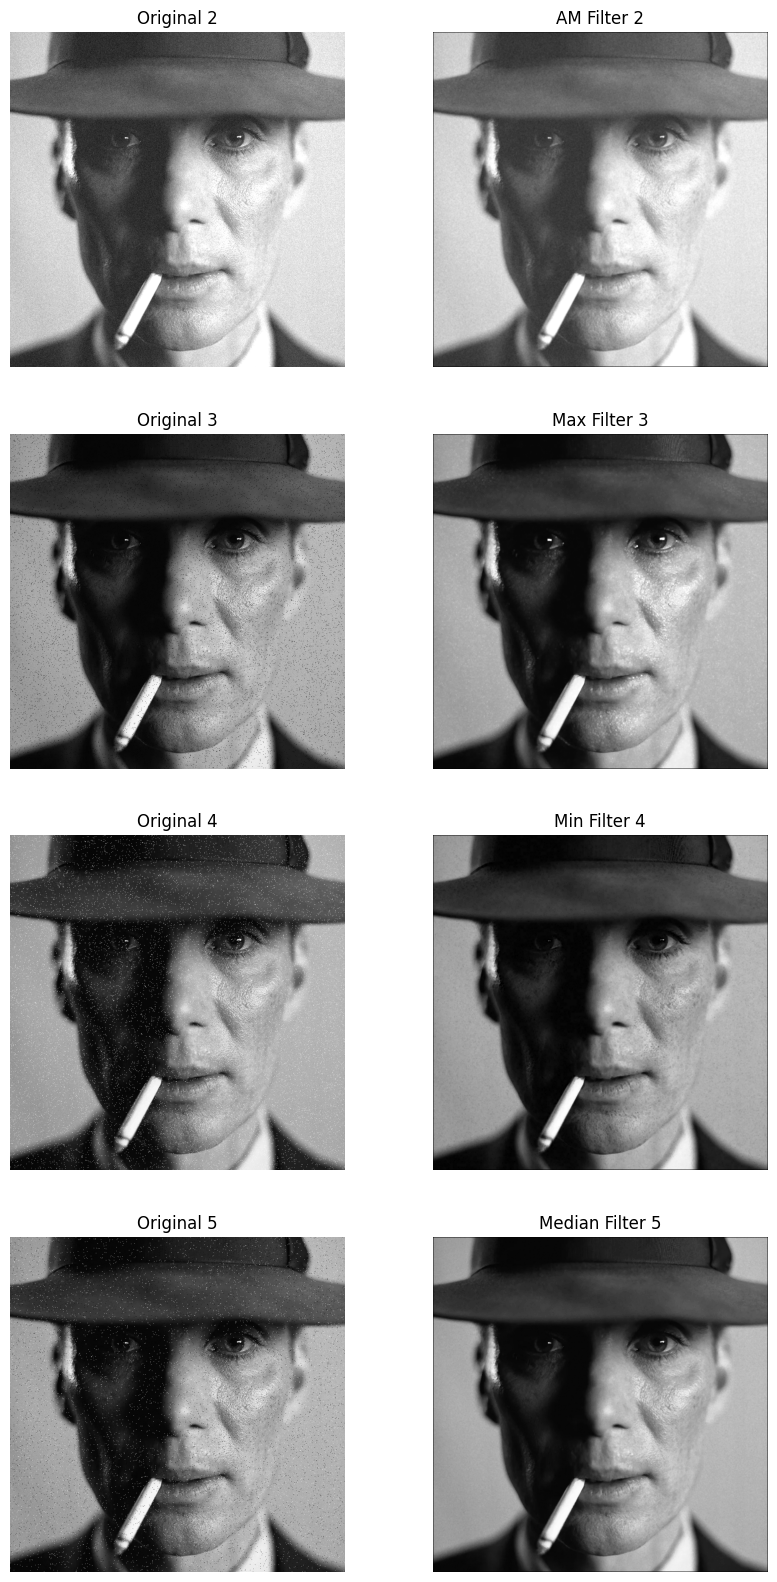

In [35]:
# Crear una nova figura amb 4 files i 2 columnes
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Subplots per a les imatges originals
axs[0, 0].imshow(imgs[1], cmap='gray'), axs[0, 0].set_title('Original 2'), axs[0, 0].axis("off")
axs[1, 0].imshow(imgs[2], cmap='gray'), axs[1, 0].set_title('Original 3'), axs[1, 0].axis("off")
axs[2, 0].imshow(imgs[3], cmap='gray'), axs[2, 0].set_title('Original 4'), axs[2, 0].axis("off")
axs[3, 0].imshow(imgs[4], cmap='gray'), axs[3, 0].set_title('Original 5'), axs[3, 0].axis("off")



axs[0, 1].imshow(AM_res[0], cmap='gray'), axs[0, 1].set_title('AM Filter 2'), axs[0, 1].axis("off")
axs[1, 1].imshow(Max_res[1], cmap='gray'), axs[1, 1].set_title('Max Filter 3'), axs[1, 1].axis("off")
axs[2, 1].imshow(Min_res[2], cmap='gray'), axs[2, 1].set_title('Min Filter 4'), axs[2, 1].axis("off")
axs[3, 1].imshow(Med_res[3], cmap='gray'), axs[3, 1].set_title('Median Filter 5'), axs[3, 1].axis("off")

# Ajustar l'espai entre els subgràfics per a millor llegibilitat
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Mostra la figura
plt.show()

**Imatge 2:**
    El millor filtre ha resultat ser el "Arithmetic mean filter", ja que aquesta foto contenia molt soroll molt semblant al de Rayleigh, i s'observa que té pics menys pronunciats a valors semblant a 255 i inexistents a 0. La imatge resultant treu la major part del soroll però, com esperàvem, la gamma de colors segueix sent reduida.

**Imatge 3:**
    L'imatge original presenta soroll punts negres "pepper" (valor 0 o molt baix). Amb el "max filter" el que fem és agafar el valor màxim per cada finestra (matriu 3x3) i assignar-lo al píxel del centre. Amb això "ignaorem" els valors més baixos marginals (punts negres) de la imatge, a menys que tots els altres siguin negres.

**Imatge 4:**
    La justificació per a aquest filtre és la simètrica a la anterior. En aquest cas la imatge presenta punts blancs "salt" (valor 255 o molt alt) i amb el "min filter" processem la imatge sense tenir en compte aquests valors dins de la finestra (matriu)

**Imatge 5:**
    En la imatge original tenim el soroll conegut com a "salt and pepper". El que fa aquesta és aillar dels valors que s'allunyen dels valors "normals", és a dir, sense tenir en compte els blancs "salt" o negres "pepper". El que obtenim és una imatge sense aquest extrems